# Análisis Exploratorio de Datos: Ubuntu-Packages

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../distros/ubuntu/ubuntu-packages.csv")

# replace value Null to NaN
df = df.replace("Null", np.nan)

Brief look at the data

In [23]:
print(df.head())
print(df.shape)

   Distro-Version  Distro-Year       Package  Description Section  \
0  18.04 - bionic         2018          acct  Description   admin   
1  18.04 - bionic         2018           acl  Description   utils   
2  18.04 - bionic         2018  acpi-support  Description   admin   
3  18.04 - bionic         2018         acpid  Description   admin   
4  18.04 - bionic         2018       adduser  Description   admin   

             Version Architecture   Priority Essential Build-Essential  ...  \
0            6.6.4-1        amd64   optional        no              no  ...   
1     2.2.52-3build1        amd64   optional        no              no  ...   
2              0.142        amd64   optional        no              no  ...   
3  1:2.0.28-1ubuntu1        amd64   optional        no              no  ...   
4       3.116ubuntu1          all  important        no             yes  ...   

  Installed-Size                                            Depends  \
0          297.0                       

In [24]:
print(df.describe())

         Distro-Year          Size  Installed-Size
count  299732.000000  2.997280e+05    2.997280e+05
mean     2020.400191  2.799956e+06    1.036722e+04
std         1.671080  1.717811e+07    8.584265e+04
min      2018.000000  7.340000e+02    2.000000e+00
25%      2018.000000  1.390600e+04    6.600000e+01
50%      2020.000000  6.090400e+04    2.870000e+02
75%      2022.000000  5.443205e+05    2.361000e+03
max      2022.000000  2.873482e+09    1.388204e+07


Now we will identify missing values and evaluate the impact on the dataset

In [25]:
columns = ["Distro-Version", "Distro-Year", "Package", "Description", "Section", "Version", "Architecture", "Priority", "Essential", "Build-Essential", "Important",
             "Maintainer", "Original-Maintainer", "Size", "Installed-Size", "Depends", "Pre-Depends", "Recommends", "Conflicts", "Suggests", "Breaks", "Replaces", "Provides", "Enhances"]

for column in columns:
    missing = df[column].isna().sum()
    print(f"{column}: {missing} missing values ({round(missing/len(df[column])*100, 2)}%)")

Distro-Version: 0 missing values (0.0%)
Distro-Year: 0 missing values (0.0%)
Package: 4 missing values (0.0%)
Description: 4 missing values (0.0%)
Section: 4 missing values (0.0%)
Version: 5 missing values (0.0%)
Architecture: 4 missing values (0.0%)
Priority: 4 missing values (0.0%)
Essential: 4 missing values (0.0%)
Build-Essential: 4 missing values (0.0%)
Important: 2271 missing values (0.76%)
Maintainer: 4 missing values (0.0%)
Original-Maintainer: 4 missing values (0.0%)
Size: 4 missing values (0.0%)
Installed-Size: 4 missing values (0.0%)
Depends: 4 missing values (0.0%)
Pre-Depends: 84 missing values (0.03%)
Recommends: 10 missing values (0.0%)
Conflicts: 25 missing values (0.01%)
Suggests: 17 missing values (0.01%)
Breaks: 29 missing values (0.01%)
Replaces: 29 missing values (0.01%)
Provides: 35 missing values (0.01%)
Enhances: 70 missing values (0.02%)


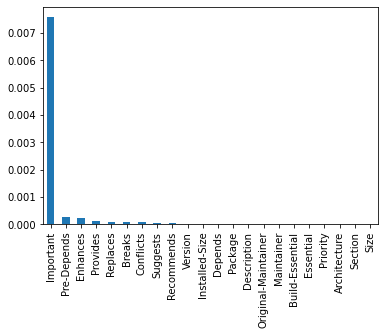

In [27]:
# create histogram for percentage of missing values
missing = df.isna().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)
missing = missing/len(df)
missing.plot.bar()
plt.show()

We can see that there are very little missing values in the dataset, so there will be very little impact on the dataset

In [26]:
# See if there are any rows that are missing all values
missing_rows = []
for index, row in df.iterrows():
    missing = True
    for column in columns:
        if not pd.isna(row[column]):
            missing = False
    if missing:
        missing_rows.append(index)
    
print(f"{len(missing_rows)} rows are missing all values")

0 rows are missing all values
